# Übungsblatt 01

## Aufgabe 2

a) Bestimme für welchen Bereich von theta die Funktion instabil ist: 

In [2]:
import numpy as np
#Definition der gegebenen Größen
E= 50*10e+9
m=511*10e+3
gam=E/m
beta=np.sqrt(1-(1/gam**(2)))
def f(x):
    (2+np.sin(x)**2)/(1-(beta*np.cos(x))**2)
    return f
#hier eine analytische Berechnung: Nenner soll 0 ergeben für Instabilität, sodass folgendes gelten muss:
theta=np.arccos(np.sqrt(1/beta))
print(theta)


nan


/tmp/ipykernel_1276/9309208.py:11: RuntimeWarning: invalid value encountered in arccos
  theta=np.arccos(np.sqrt(1/beta))


Da das Ergebnis der analytischen Berechnung scheinbar nicht darstellbar ist, wird ein Plot aufgezeichnet: 

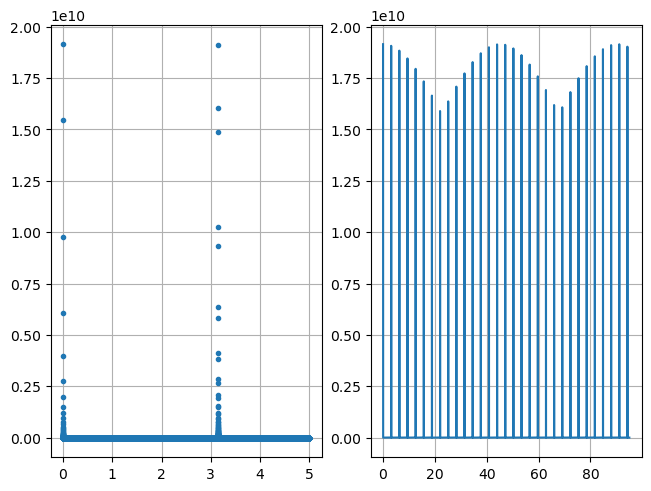

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#Definition der gegebenen Größen
E= 50*10e+9
m=511*10e+3
gam=E/m
beta=np.sqrt(1-(1/gam**(2)))
def f(x):
    f=(2+np.sin(x)**2)/(1-(beta*np.cos(x))**2)
    return f

x=np.linspace(0,5,1000000)
w=np.linspace(0,95,10000000)
fig, (ax1,ax4)=plt.subplots(1,2,constrained_layout=True)
#print(f(x))
ax1.plot(x,f(x),".",label="Bereich nahe 0")
ax4.plot(w,f(w))
ax1.grid()
ax4.grid()
plt.show()

Die kritischen Bereiche befinden sich in der nahen Umgebung von 0 und ein vielfaches von pi!

b)/ c) Nach möglichst geeigneter Umformung unter Verwendung der Hinweise scheint die Funktion g eine höhere Stabilität für einen 
Winkel gegen 0 und pi zu sein, da im Nenner eine Summe über eine sin- Funktion steht, sodass mit der Division der Nenner im kritischen Bereich 
ungleich 0 ist (das beta zum Quadrat beträgt näherungsweise 1, sodass f tatsächlich gegen 0 und ein vielfaches vo pi divergiert). Eine höhere Stabilität
kann man aber erreichen, wenn die Summanden im Nenner von gleicher Größenordnung wären.

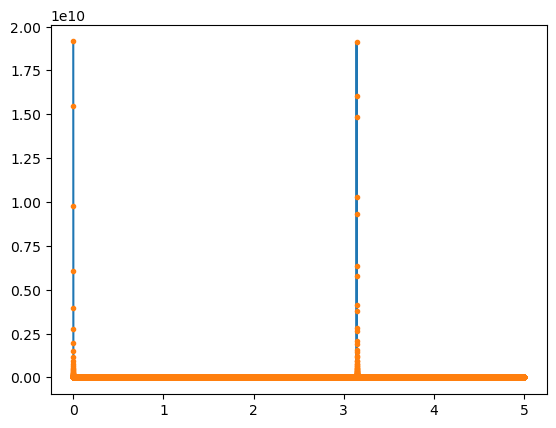

1.0444840001090948e-10
0.9999999998955516


In [38]:
def g(x):
    g=((2+np.sin(x)**(2))/((1/(gam*beta)**2)+np.sin(x)**2))*(1/beta**2)
    return g

plt.plot(x,g(x))
plt.plot(x,f(x),".")  
plt.show()
print((1/(gam*beta)**2))
print(beta**2)

d)/e) Berechnung der Konditionsnummer von f: 

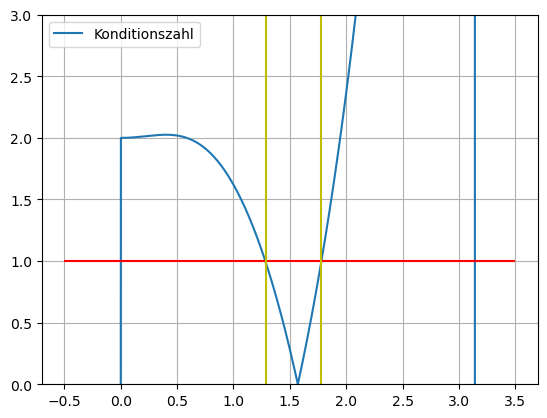

In [65]:
#nach der Vorlesung lässt sich die Konditionsnummer mithilfe der Division der totalen Ableitung durch die Funktion selbst multipliziert mit x bestimmen
#die Konditionszahl der analaytisch stabileren Lösung wird hier berechnet
def k1(x):
    ks=((2+np.sin(x)**2)*2*np.cos(x)*np.sin(x))/((1/(gam*beta)**2)+np.sin(x)**2)
    return ks
#Konditionszahl als Funktion von x:
def K(x):
    K=((k1(x)+2*np.sin(x)*np.cos(x))/(2+np.sin(x)**2))*x  
    return abs(K)



x=np.linspace(0,np.pi,10000)
plt.plot(x,K(x),label="Konditionszahl")
plt.legend(loc="best")
plt.hlines(1,-0.5,3.5,colors="r")
plt.vlines(1.29,0,3,colors="y")
plt.vlines(1.78,0,3,colors="y")
plt.ylim(0,3)
plt.grid()
plt.show()

Im Bereich [1.3,1.8) liegt eine gute Kondition vor, wohingegen im restlichen Bereich die Konditionszahl den Wert 1 deutlich übersteigt und somit eine schlechte Kondition
ersichtlich wird.

e) Unter Stabilität versteht man den Einfluss von Rundungsfehlern auf eine störanfällige maschinelle Rechenmethode, während die Kondition den Einfluss eines 
anfänglichen Fehlers auf eine präzisere maschinelle Rechenmethode beschreibt.